# Scenarios evaluation

This part of the code contains the scripts to evaluate 12 different scenarios proposed for Iowa using different combinations of the parameters that 

In [1]:
%matplotlib inline 
import numpy as np 
import pylab as pl 
import pandas as pd 
from matplotlib import gridspec
from ifis_tools import series_tools as ser
from aclayer import core
import warnings
warnings.filterwarnings('ignore')

In [3]:
colors = {'ifc-hlm': '#d6604d',
         'a-hlm': '#92c5de',
         'd-hlm': '#225ea8'}

# KGE by events

## Code to obtain the kge of each product for all the events

In [4]:
Emet = pd.read_msgpack('data/results/Events_Metrics_sce.msg')

In [174]:
#Get the intersection of the kge indexes for all the events 
products = Emet['product'].unique().tolist()

#Do it for the initial product
a,b = core.get_intersec_events(Emet, 'ifc-hlm',products[5],'kge',0.1)
c = b[['kge','link']]
c.set_index([c.index, 'link'], inplace=True)
c.rename(columns={'kge':products[5]}, inplace=True)
#b.set_index([b.index, 'link'], inplace=True)
#c['a-hlm'] = b['kge']

#Iterate through products
for prod in products[6:]:
    a,b = core.get_intersec_events(Emet, 'ifc-hlm',prod,'kge',0.1)
    b.set_index([b.index, 'link'], inplace=True)
    idx = c.index.intersection(b.index)
    c = c.loc[idx]
    c[prod] = b.loc[idx, 'kge']

#Obtain the best for each event
best = c.idxmax(axis = 1)
max_kge = c.max(axis=1)
c['max_kge'] = max_kge

In [177]:
for prod in ['a-hlm','d-hlm','t-hlm']:
    a,b = core.get_intersec_events(Emet, 'ifc-hlm',prod,'kge',0.1)
    b.set_index([b.index, 'link'], inplace=True)
    idx = c.index.intersection(b.index)
    c = c.loc[idx]
    c[prod] = b.loc[idx, 'kge']

In [185]:
a,b = core.get_intersec_events(Emet, 'ifc-hlm','a-hlm', 'kge',0.1)
a.set_index([a.index, 'link'], inplace=True)
idx = c.index.intersection(a.index)
c = c.loc[idx]
c['ifc-hlm'] = a.loc[idx, 'kge']

## KGE of the best scenario vs the HLM-l

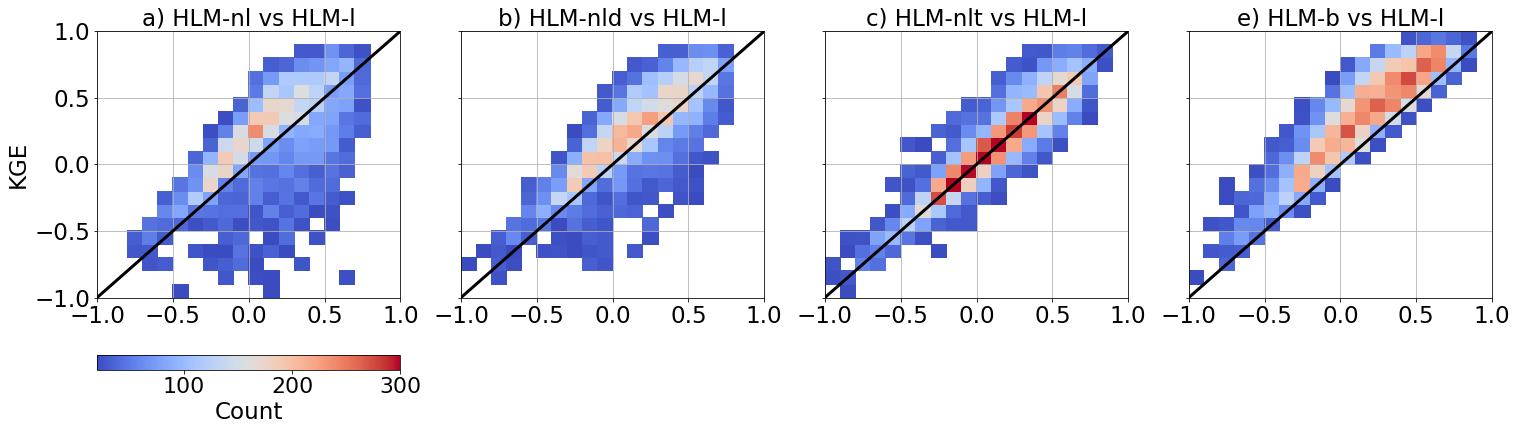

In [251]:
fig = pl.figure(figsize=(25,7))
cont = 1
names = ['a) HLM-nl vs HLM-l','b) HLM-nld vs HLM-l','c) HLM-nlt vs HLM-l','e) HLM-b vs HLM-l']
for prod in ['a-hlm','d-hlm','t-hlm', 'max_kge']:
    ax = fig.add_subplot(1,4,cont)
    #a,b = get_intersec_events(Emet, 'ifc-hlm',prod,'kge',0.1)
    h = pl.hist2d(c['ifc-hlm'], c[prod], bins = np.arange(-1,1.2,0.1),
                  vmin = 20, vmax = 300, 
                  cmin=20, cmax=1000, cmap = pl.get_cmap('coolwarm'))
    cmap = pl.colorbar(orientation = 'horizontal', pad = 0.15)
    pl.plot([-1,1],[-1,1], 'k',lw = 3)
    ax.tick_params(labelsize = 23)
    ax.set_xticks([-1,-0.5,0.0,0.5,1.0])
    ax.set_yticks(ax.get_xticks())
    ax.grid()
    if cont != 1:
        cmap.remove()
        ax.set_yticklabels([])
    else:
        cmap.ax.tick_params(labelsize = 22)
        cmap.ax.set_xlabel('Count', size = 23)
        ax.set_ylabel('KGE', size = 23)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_title(names[cont-1], size = 23)
    cont+=1
pl.savefig('figures/kge_events_Best_vs_current.png', bbox_inches = 'tight')

### Histogram of the Best scenaio vs HLM-l

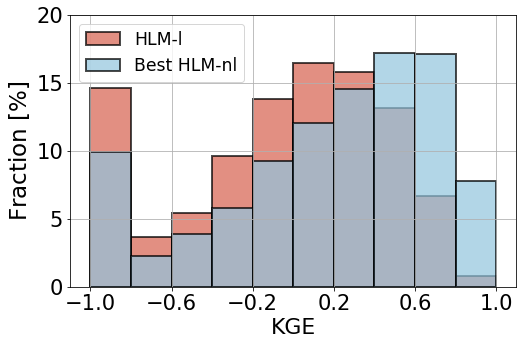

In [250]:
fig = pl.figure(figsize=(8,5))
ax = fig.add_subplot(111)
bins = np.arange(-1,1.2,0.2)
h,b = core.get_histogram(c['ifc-hlm'], bins, inf = -1)
h = 100*h/h.sum()
pl.bar(b[:-1], h, 0.2,align = 'edge', color = colors['ifc-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2,
      label = 'HLM-l')
h,b = core.get_histogram(c['max_kge'], bins, inf = -1)
h = 100*h/h.sum()
pl.bar(b[:-1], h, 0.2,align = 'edge', color = colors['a-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2,
      label = 'Best HLM-nl')
ax.tick_params(labelsize = 21)
ax.set_xlabel('KGE', size = 22)
ax.set_xticks([-1,-0.6,-0.2,0.2,0.6,1.0])
ax.set_yticks([0,5,10,15,20])
ax.legend(loc = 0, fontsize = 'xx-large')
ax.set_ylabel('Fraction [$\%$]', size = 23)
ax.grid()
pl.savefig('figures/kge_histogram_best_vs_HLM-l.png', bbox_inches = 'tight')

### Best scenario frequency

In [230]:
h= []
for prod in products[5:]:
    h.append(best[best == prod].size)
h = np.array(h)
h = 100 * h / h.sum()

In [307]:
h= []
for prod in products[5:]:
    h.append(best_sce.loc[best_sce['product'] == prod].shape[0])
h = np.array(h)
h = 100 * h / h.sum()

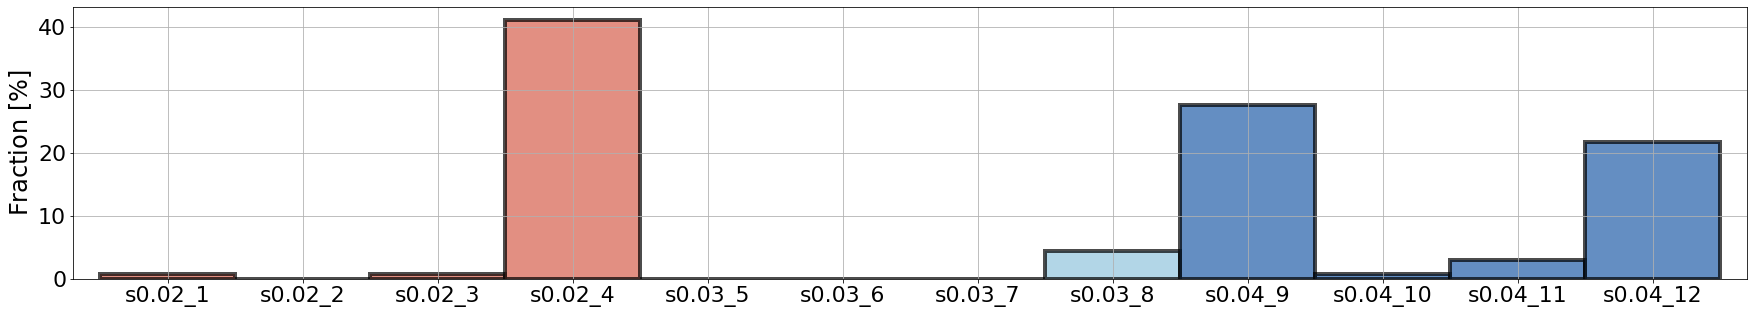

In [308]:
fig = pl.figure(figsize=(30,5))
ax = fig.add_subplot(111)
bar = pl.bar(products[5:], h, 1, alpha = 0.7, edgecolor = 'k', lw = 2)
for i in [0,1,2,3]:
    bar[i].set_color(colors['ifc-hlm'])
    bar[i].set_edgecolor('k')
    bar[i].set_linewidth(4.0)
for i in [4,5,6,7]:
    bar[i].set_color(colors['a-hlm'])
    bar[i].set_edgecolor('k')
    bar[i].set_linewidth(4.0)
for i in [8,9,10,11]:
    bar[i].set_color(colors['d-hlm'])
    bar[i].set_edgecolor('k')
    bar[i].set_linewidth(4.0)
ax.set_xlim()
ax.set_ylabel('Fraction [$\%$]', size = 24)
ax.tick_params(labelsize = 22)
ax.set_xlim(-0.7,11.7)
ax.grid()
#pl.savefig('figures/bar_best_setup.png', bbox_inches = 'tight')

In [275]:
def count_products(x):
    h= []
    for prod in products[5:]:
        h.append(x[x == prod].size)
    h = np.array(h)
    return 100 * h / h.sum()

In [298]:
best_sce = {}
links = np.unique(best.index.get_level_values(level='link')).tolist()
for l in links:
    d = best.xs(l,level = 'link')
    prod = products[5:][count_products(d).argmax()]
    p = count_products(d).max()
    b_kge = np.percentile(c.xs(l, level = 'link')['max_kge'], 50)
    i_kge = np.percentile(c.xs(l, level = 'link')['ifc-hlm'], 50)
    best_sce.update({l:{'product': prod, 'p':p,'best_kge':b_kge, 'ifc-hlm':i_kge}})
best_sce = pd.DataFrame(best_sce).T

In [296]:
np.percentile(c.xs('74725', level = 'link')['max_kge'], 50)

-0.20586478049668222

In [315]:
best_sce.to_csv('data/processed/best_kge_by_event.csv')

In [312]:
best_sce.index.rename('link', inplace=True)

In [314]:
best_sce

,best_kge,ifc-hlm,p,product
link,,,,
104818,0.397558,0.0850203,33.0532,s0.02_4
108201,0.203531,-0.093602,41.6667,s0.02_4
110818,0.463096,0.209224,23.7179,s0.02_4
114284,0.479373,0.178543,66.6667,s0.02_4
132569,0.170936,-0.0814605,40.7895,s0.02_4
143605,0.233883,-0.00996444,44.6667,s0.02_4
157405,-0.0193156,-0.1702,31.6129,s0.02_4
157543,0.098197,-0.0651413,21.374,s0.04_9
162846,0.0268602,-0.176909,39.5062,s0.02_4


# Qpeak difference

In [ ]:
bins = []
val = 50
bins.append(val)
for i in range(5):
    val *= 2.5
    bins.append(val)
bins = np.array(bins)
bins2 = (bins[:-1]+bins[1:])/2.

fig = pl.figure(figsize=(20,8))
cont = 1
pre = ''
name = ['a)','b)','c)','d)','e)','f)','g)','h)','i)']
for y1,y2 in zip([2002,2009,2015],[2008,2014,2018]):
    y1t = str(y1)
    y2t = str(y2)
    
    for model,co in zip(['d-hlm'],range(2)):
        ax = fig.add_subplot(1,3,cont)

        a,b,idx = core.get_intersec('qpeak', 'usgs','ifc-hlm',Emet, y1t,y2t)
        po,ps = core.percentiles(a['qpeak'].loc[idx], b['qpeak'].loc[idx], bins = bins)
        po2,ps2 = core.percentiles(a['qpeak'].loc[idx], a['qpeak'].loc[idx], bins = bins)
        c1 = a['qpeak'].loc[idx].values
        c2 = b['qpeak'].loc[idx].values
        p = np.where((c1>100) & (c2 > 100))[0]
        ax.scatter(c1[p],c2[p], c = '#d6604d',s = 100, edgecolors='k', alpha = 0.7, label = pre+'Operational')
        ax.plot(ps2,ps, '#b2182b',lw = 5)

        a,b,idx = core.get_intersec('qpeak', 'usgs',model,Me,y1t,y2t)
        po,ps = core.percentiles(a['qpeak'].loc[idx], b['qpeak'].loc[idx], bins = bins)
        c1 = a['qpeak'].loc[idx].values
        c2 = b['qpeak'].loc[idx].values
        p = np.where((c1>100) & (c2 > 100))[0]
        ax.scatter(c1[p],c2[p], c = '#92c5de',s = 100, edgecolors='k', alpha = 0.7, label = pre+'Active')
        ax.plot(ps2,ps, '#053061',lw = 5)

        pl.loglog([5,6000],[5,6000], 'k', lw = 3)
        ax.set_title(name[cont-1]+' '+y1t+'-'+y2t, size = 22)
        ax.set_xlim(100,6000)
        ax.set_ylim(100,6000)
        ax.vlines(bins2, 100,6000, lw = 0.5, ls = '--')
        ax.hlines(bins2, 100,6000, lw = 0.5, ls = '--')
        ax.tick_params(labelsize = 20)
        if cont == 1:
            ax.legend(loc = 0, fontsize = 'xx-large')

        if cont == 1:  
            ax.set_ylabel('Simulated peak flow [$m^3 \cdot s^{-1}$]', size = 22)
            ax.set_xlabel('Observed peak flow [$m^3 \cdot s^{-1}$]', size = 22)
        if cont == 2:
            pre = '_'
        cont+=1
pl.savefig('figures/Peak_active_vs_operational.png', bbox_inches = 'tight')